In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#read csv files

airlines_df= pd.read_csv('Resources/airlines.csv', low_memory=False)
flights_df = pd.read_csv('Resources/flights.csv', low_memory=False)

In [3]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [4]:
#show first 5 records
airlines_df.head()


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [5]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
#determine the number of nulls per column
flights_df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [7]:
#drop unneeded columns
airline_data_dropped_df=flights_df.drop(columns=['TAIL_NUMBER', 'WHEELS_ON', 'WHEELS_OFF', 'TAXI_IN','TAXI_OUT', 'AIR_TIME'])

In [8]:
airline_data_dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   ORIGIN_AIRPORT       object 
 7   DESTINATION_AIRPORT  object 
 8   SCHEDULED_DEPARTURE  int64  
 9   DEPARTURE_TIME       float64
 10  DEPARTURE_DELAY      float64
 11  SCHEDULED_TIME       float64
 12  ELAPSED_TIME         float64
 13  DISTANCE             int64  
 14  SCHEDULED_ARRIVAL    int64  
 15  ARRIVAL_TIME         float64
 16  ARRIVAL_DELAY        float64
 17  DIVERTED             int64  
 18  CANCELLED            int64  
 19  CANCELLATION_REASON  object 
 20  AIR_SYSTEM_DELAY     float64
 21  SECURITY_DELAY       float64
 22  AIRLINE_DELAY        float64
 23  LATE_AIRCRAFT_DELAY  float64
 24

In [9]:
#merge the year, month and day columns into one Date column
airline_data_dropped_df['DATE'] = pd.to_datetime(airline_data_dropped_df[['YEAR', 'MONTH', 'DAY']])

#drop the individual year, month and day columns
airline_data_dropped_df = airline_data_dropped_df.drop(['YEAR', 'MONTH', 'DAY'], axis=1)

In [10]:
#function to determine if flight was on time or delayed
def delay_status(arrival_depature_time):
    flight_status=''
    if arrival_depature_time  > 15:
        # Extract 'name' and 'value'
        flight_status='DELAYED'
    else:
        flight_status='ON_TIME'
        
    return flight_status

#assign depature flight status (delayed or ontime) to new column
airline_data_dropped_df['DEPATURE_DELAY_STATUS']=airline_data_dropped_df['DEPARTURE_DELAY'].apply(delay_status)


#assign arrival flight status (delayed or ontime) to new column
airline_data_dropped_df['ARRIVAL_DELAY_STATUS']=airline_data_dropped_df['ARRIVAL_DELAY'].apply(delay_status)

In [11]:
airline_data_dropped_df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,DEPATURE_DELAY_STATUS,ARRIVAL_DELAY_STATUS
0,4,AS,98,ANC,SEA,5,2354.0,-11.0,205.0,194.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,ON_TIME,ON_TIME
1,4,AA,2336,LAX,PBI,10,2.0,-8.0,280.0,279.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,ON_TIME,ON_TIME
2,4,US,840,SFO,CLT,20,18.0,-2.0,286.0,293.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,ON_TIME,ON_TIME
3,4,AA,258,LAX,MIA,20,15.0,-5.0,285.0,281.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,ON_TIME,ON_TIME
4,4,AS,135,SEA,ANC,25,24.0,-1.0,235.0,215.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,ON_TIME,ON_TIME


In [12]:
#set index to the Date column
airline_data_dropped_df=airline_data_dropped_df.set_index('DATE', drop=True)

#slice and get data from January to April
first_quarter_df = airline_data_dropped_df['2015-01-01':'2015-04-30']

In [13]:
first_quarter_df=first_quarter_df.rename(columns={"AIRLINE": "AIRLINE_CODE"})

In [14]:
first_quarter_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1888622 entries, 2015-01-01 to 2015-04-30
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   DAY_OF_WEEK            int64  
 1   AIRLINE_CODE           object 
 2   FLIGHT_NUMBER          int64  
 3   ORIGIN_AIRPORT         object 
 4   DESTINATION_AIRPORT    object 
 5   SCHEDULED_DEPARTURE    int64  
 6   DEPARTURE_TIME         float64
 7   DEPARTURE_DELAY        float64
 8   SCHEDULED_TIME         float64
 9   ELAPSED_TIME           float64
 10  DISTANCE               int64  
 11  SCHEDULED_ARRIVAL      int64  
 12  ARRIVAL_TIME           float64
 13  ARRIVAL_DELAY          float64
 14  DIVERTED               int64  
 15  CANCELLED              int64  
 16  CANCELLATION_REASON    object 
 17  AIR_SYSTEM_DELAY       float64
 18  SECURITY_DELAY         float64
 19  AIRLINE_DELAY          float64
 20  LATE_AIRCRAFT_DELAY    float64
 21  WEATHER_DELAY          float64
 22  DEP

In [15]:
#drop rows with null depature delays
first_quarter_df.dropna(subset=['DEPARTURE_DELAY'], inplace=True)

<Axes: title={'center': 'Delayed Depature Flights by Day of the Week'}, xlabel='Day of the Week'>

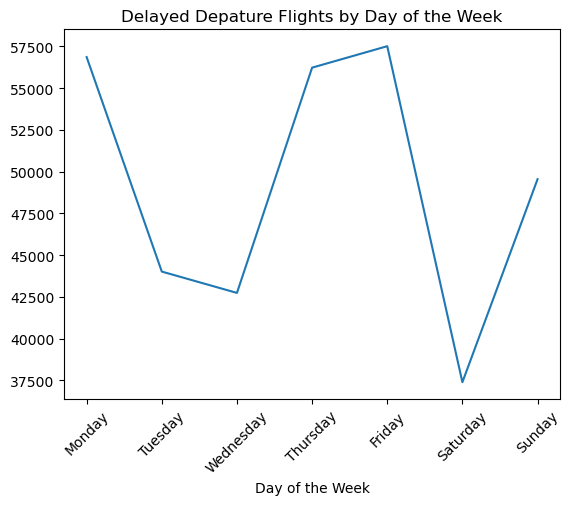

In [16]:
#get all the delayed depatures
delayed_depatures=first_quarter_df[first_quarter_df['DEPATURE_DELAY_STATUS']=='DELAYED']

#get day of the week for all delayed depatures
day_of_week_depature_df=pd.DataFrame(delayed_depatures[["DAY_OF_WEEK"]])

#count all delayed depatures and group them by day of the week
depatures_day_of_week_delays_df=pd.DataFrame(day_of_week_depature_df.groupby(['DAY_OF_WEEK']).value_counts())

#reset index
depatures_day_of_week_delays_df=depatures_day_of_week_delays_df.reset_index('DAY_OF_WEEK')

#function to get the day name from the day number
def get_day_name(day_number):
    day_name=''
    
    match day_number:
        case 1:
            day_name="Monday"
        case 2:
            day_name="Tuesday"
        case 3:
            day_name="Wednesday"
        case 4:
            day_name="Thursday"
        case 5:
            day_name="Friday"
        case 6:
            day_name="Saturday"
        case 7:
            day_name="Sunday"
    
    return day_name

#get the name of the day of the week
depatures_day_of_week_delays_df["DAY_NAME"]= depatures_day_of_week_delays_df['DAY_OF_WEEK'].apply(get_day_name)

#do a line plot for all the delayed depatures by the day of the week
depatures_day_of_week_delays_df.set_index('DAY_NAME')['count'].plot(title='Delayed Depature Flights by Day of the Week', xlabel="Day of the Week", rot=45)


<Axes: title={'center': 'Delayed Flight Arrivals by Day of the Week'}, xlabel='Day of the Week'>

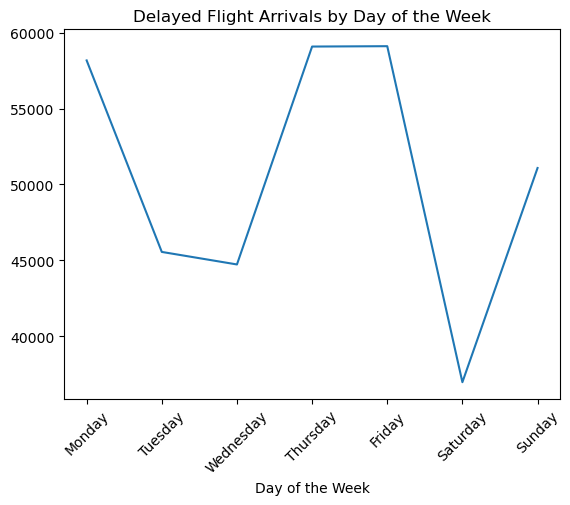

In [17]:
#get all the delayed arrivals
delayed_arrivals=first_quarter_df[first_quarter_df['ARRIVAL_DELAY_STATUS']=='DELAYED']

#get day of week for all delayed arrivals
day_of_week_arrivals_df=pd.DataFrame(delayed_arrivals[["DAY_OF_WEEK"]])

#groub delayed arrivals and count them
day_of_week_delayed_arrivals_df=pd.DataFrame(day_of_week_arrivals_df.groupby(['DAY_OF_WEEK']).value_counts())

#reset the index
day_of_week_delayed_arrivals_df=day_of_week_delayed_arrivals_df.reset_index('DAY_OF_WEEK')



day_of_week_delayed_arrivals_df["DAY_NAME"]= day_of_week_delayed_arrivals_df['DAY_OF_WEEK'].apply(get_day_name)

day_of_week_delayed_arrivals_df.set_index('DAY_NAME')['count'].plot(title='Delayed Flight Arrivals by Day of the Week', xlabel="Day of the Week", rot=45)

In [18]:
#get the top 9 airlines with the most depatures and arrivals. This filters out airlines with lower volume
airlines_to_study=pd.DataFrame(first_quarter_df['AIRLINE_CODE'].value_counts().head(9))

airlines_to_study=airlines_to_study.reset_index()

#function to get airline name from the airline code
def get_airline_name(iata_code):
    airline_name=''
    
    for index, row in airlines_df.iterrows():
        if row['IATA_CODE']==iata_code:
            airline_name=row['AIRLINE']
    
    return airline_name

#get airline name and assign it to the AIRLINE_NAME column
airlines_to_study['AIRLINE_NAME']=airlines_to_study['AIRLINE_CODE'].apply(get_airline_name)

#rename the count column to TOTAL_NUMBER_OF_FLIGHTS
airlines_to_study=airlines_to_study.rename(columns={"count": "TOTAL_NUMBER_OF_FLIGHTS"})

airlines_to_study=airlines_to_study.reset_index()

#reorder the columns
airlines_to_study = airlines_to_study[["AIRLINE_CODE","AIRLINE_NAME","TOTAL_NUMBER_OF_FLIGHTS"]]

airlines_to_study

,AIRLINE_CODE,AIRLINE_NAME,TOTAL_NUMBER_OF_FLIGHTS
0,WN,Southwest Airlines Co.,397987
1,DL,Delta Air Lines Inc.,268671
2,EV,Atlantic Southeast Airlines,191000
3,OO,Skywest Airlines Inc.,187848
4,AA,American Airlines Inc.,169512
5,UA,United Air Lines Inc.,156720
6,US,US Airways Inc.,127261
7,MQ,American Eagle Airlines Inc.,101896
8,B6,JetBlue Airways,83027


In [19]:
#create a list to filter out our data in our analysis
airline_filter_list= airlines_to_study['AIRLINE_CODE'].tolist()

airline_filter_list


['WN', 'DL', 'EV', 'OO', 'AA', 'UA', 'US', 'MQ', 'B6']

In [20]:
#filter and only get dataset for the top 9 high volume airlines
first_quarter_filtered_df=first_quarter_df[first_quarter_df['AIRLINE_CODE'].isin(airline_filter_list)] 

#get top 9 airlines with depature delays
airline_depatures_df = first_quarter_filtered_df[["AIRLINE_CODE","DEPATURE_DELAY_STATUS"]]

#get a count of depature delays grouped by airline
departures_by_airline=pd.DataFrame(airline_depatures_df.groupby(['AIRLINE_CODE','DEPATURE_DELAY_STATUS']).value_counts())

departures_by_airline=departures_by_airline.reset_index()

#Get actual airline name
departures_by_airline['AIRLINE_NAME']=departures_by_airline['AIRLINE_CODE'].apply(get_airline_name)
#departures_by_airline=departures_by_airline.set_index(['AIRLINE','DEPATURE_DELAY_STATUS'])

#rename count column
departures_by_airline=departures_by_airline.rename(columns={"count": "TOTAL_NUMBER_OF_FLIGHTS"})

#reorder the columns
departures_by_airline = departures_by_airline[["AIRLINE_CODE","AIRLINE_NAME","DEPATURE_DELAY_STATUS", "TOTAL_NUMBER_OF_FLIGHTS"]]

departures_by_airline


,AIRLINE_CODE,AIRLINE_NAME,DEPATURE_DELAY_STATUS,TOTAL_NUMBER_OF_FLIGHTS
0,AA,American Airlines Inc.,DELAYED,32405
1,AA,American Airlines Inc.,ON_TIME,137107
2,B6,JetBlue Airways,DELAYED,19397
3,B6,JetBlue Airways,ON_TIME,63630
4,DL,Delta Air Lines Inc.,DELAYED,39469
5,DL,Delta Air Lines Inc.,ON_TIME,229202
6,EV,Atlantic Southeast Airlines,DELAYED,34149
7,EV,Atlantic Southeast Airlines,ON_TIME,156851
8,MQ,American Eagle Airlines Inc.,DELAYED,25629
9,MQ,American Eagle Airlines Inc.,ON_TIME,76267


In [21]:
#set index
departures_by_airline=departures_by_airline.set_index('AIRLINE_NAME', drop=True)

#departures_by_airline
depature_delays_df=departures_by_airline[departures_by_airline['DEPATURE_DELAY_STATUS']=='DELAYED']

#rename columns
depature_delays_df=depature_delays_df.rename(columns={'TOTAL_NUMBER_OF_FLIGHTS': 'TOTAL_DELAYED_FLIGHTS'})

depature_delays_df

,AIRLINE_CODE,DEPATURE_DELAY_STATUS,TOTAL_DELAYED_FLIGHTS
AIRLINE_NAME,,,
American Airlines Inc.,AA,DELAYED,32405
JetBlue Airways,B6,DELAYED,19397
Delta Air Lines Inc.,DL,DELAYED,39469
Atlantic Southeast Airlines,EV,DELAYED,34149
American Eagle Airlines Inc.,MQ,DELAYED,25629
Skywest Airlines Inc.,OO,DELAYED,32219
United Air Lines Inc.,UA,DELAYED,37282
US Airways Inc.,US,DELAYED,18572
Southwest Airlines Co.,WN,DELAYED,78927


<Axes: title={'center': 'Departure Delays for Top 9 Airlines'}, xlabel='AIRLINE_NAME'>

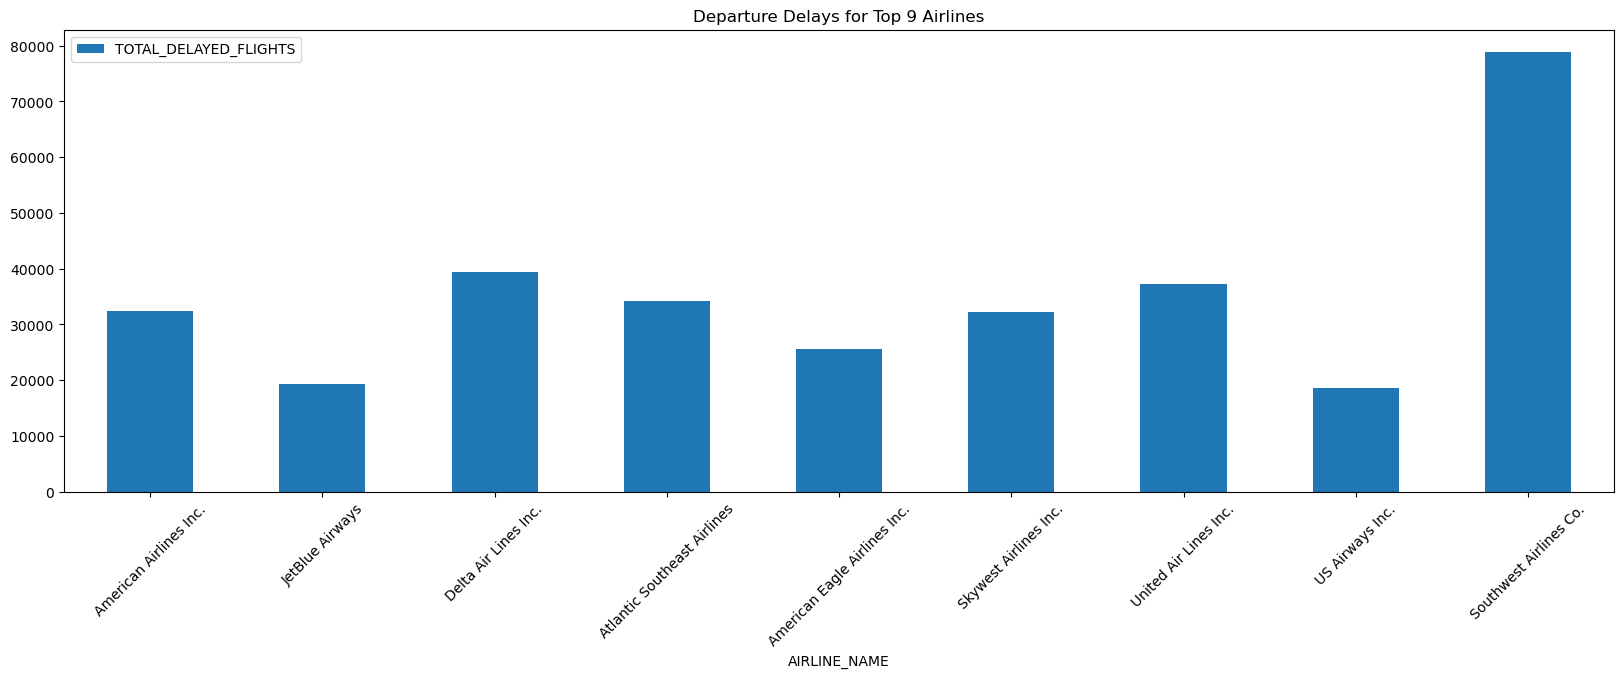

In [22]:
#draw a bar graph showing delays by airline
depature_delays_df.plot(kind="bar", figsize=(20,6), rot=45, title='Departure Delays for Top 9 Airlines')

<Axes: title={'center': 'Top 9 Airlines Delayed Depatures Pie Chart'}>

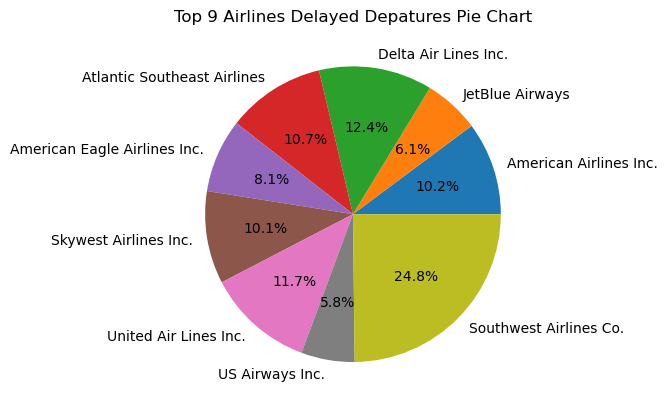

In [23]:
#draw a pie chart

depature_delays_df.plot.pie(y='TOTAL_DELAYED_FLIGHTS', autopct='%1.1f%%', ylabel='', legend=False, rot=45, title="Top 9 Airlines Delayed Depatures Pie Chart")

In [24]:
#get the top 9 airlines with the most flights
first_quarter_filtered_df=first_quarter_df[first_quarter_df['AIRLINE_CODE'].isin(airline_filter_list)] 

#drop rows with null arruvil delays
first_quarter_filtered_df.dropna(subset=['ARRIVAL_DELAY'], inplace=True)

#get airlines with their respective delay statuses
airline_arrivals_df = first_quarter_filtered_df[["AIRLINE_CODE","ARRIVAL_DELAY_STATUS"]]

airline_arrivals_df

C:\Users\My Lenovo\AppData\Local\Temp\ipykernel_24412\2524016905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_quarter_filtered_df.dropna(subset=['ARRIVAL_DELAY'], inplace=True)


,AIRLINE_CODE,ARRIVAL_DELAY_STATUS
DATE,,
2015-01-01,AA,ON_TIME
2015-01-01,US,ON_TIME
2015-01-01,AA,ON_TIME
2015-01-01,DL,ON_TIME
2015-01-01,US,ON_TIME
...,...,...
2015-04-30,B6,ON_TIME
2015-04-30,B6,ON_TIME
2015-04-30,B6,ON_TIME


In [25]:
#get sum of arrivals statuses based on airline
arrivals_by_airline=pd.DataFrame(airline_arrivals_df.groupby(['AIRLINE_CODE','ARRIVAL_DELAY_STATUS']).value_counts())

#rename column
arrivals_by_airline=arrivals_by_airline.rename(columns={'count': 'NUMBER_OF_ARRIVALS'})

arrivals_by_airline=arrivals_by_airline.reset_index()

#use airline code to get airline name
arrivals_by_airline['AIRLINE_NAME']=arrivals_by_airline['AIRLINE_CODE'].apply(get_airline_name)

#create dataframe based needed columns
arrivals_by_airline = arrivals_by_airline[["AIRLINE_CODE","AIRLINE_NAME","ARRIVAL_DELAY_STATUS", "NUMBER_OF_ARRIVALS"]]

arrivals_by_airline


,AIRLINE_CODE,AIRLINE_NAME,ARRIVAL_DELAY_STATUS,NUMBER_OF_ARRIVALS
0,AA,American Airlines Inc.,DELAYED,34596
1,AA,American Airlines Inc.,ON_TIME,134277
2,B6,JetBlue Airways,DELAYED,20831
3,B6,JetBlue Airways,ON_TIME,61876
4,DL,Delta Air Lines Inc.,DELAYED,38459
5,DL,Delta Air Lines Inc.,ON_TIME,229690
6,EV,Atlantic Southeast Airlines,DELAYED,39227
7,EV,Atlantic Southeast Airlines,ON_TIME,150872
8,MQ,American Eagle Airlines Inc.,DELAYED,29153
9,MQ,American Eagle Airlines Inc.,ON_TIME,72197


In [26]:
#get all delayed arrival flights
arrival_delays_df=arrivals_by_airline[arrivals_by_airline['ARRIVAL_DELAY_STATUS']=='DELAYED']

#rename column
arrival_delays_df=arrival_delays_df.rename(columns={'NUMBER_OF_ARRIVALS': 'NUMBER_OF_DELAYED_ARRIVALS'})


arrival_delays_df=arrival_delays_df.set_index('AIRLINE_NAME')
arrival_delays_df.head(9)

,AIRLINE_CODE,ARRIVAL_DELAY_STATUS,NUMBER_OF_DELAYED_ARRIVALS
AIRLINE_NAME,,,
American Airlines Inc.,AA,DELAYED,34596
JetBlue Airways,B6,DELAYED,20831
Delta Air Lines Inc.,DL,DELAYED,38459
Atlantic Southeast Airlines,EV,DELAYED,39227
American Eagle Airlines Inc.,MQ,DELAYED,29153
Skywest Airlines Inc.,OO,DELAYED,35565
United Air Lines Inc.,UA,DELAYED,32488
US Airways Inc.,US,DELAYED,23528
Southwest Airlines Co.,WN,DELAYED,70432


<Axes: xlabel='AIRLINE_NAME'>

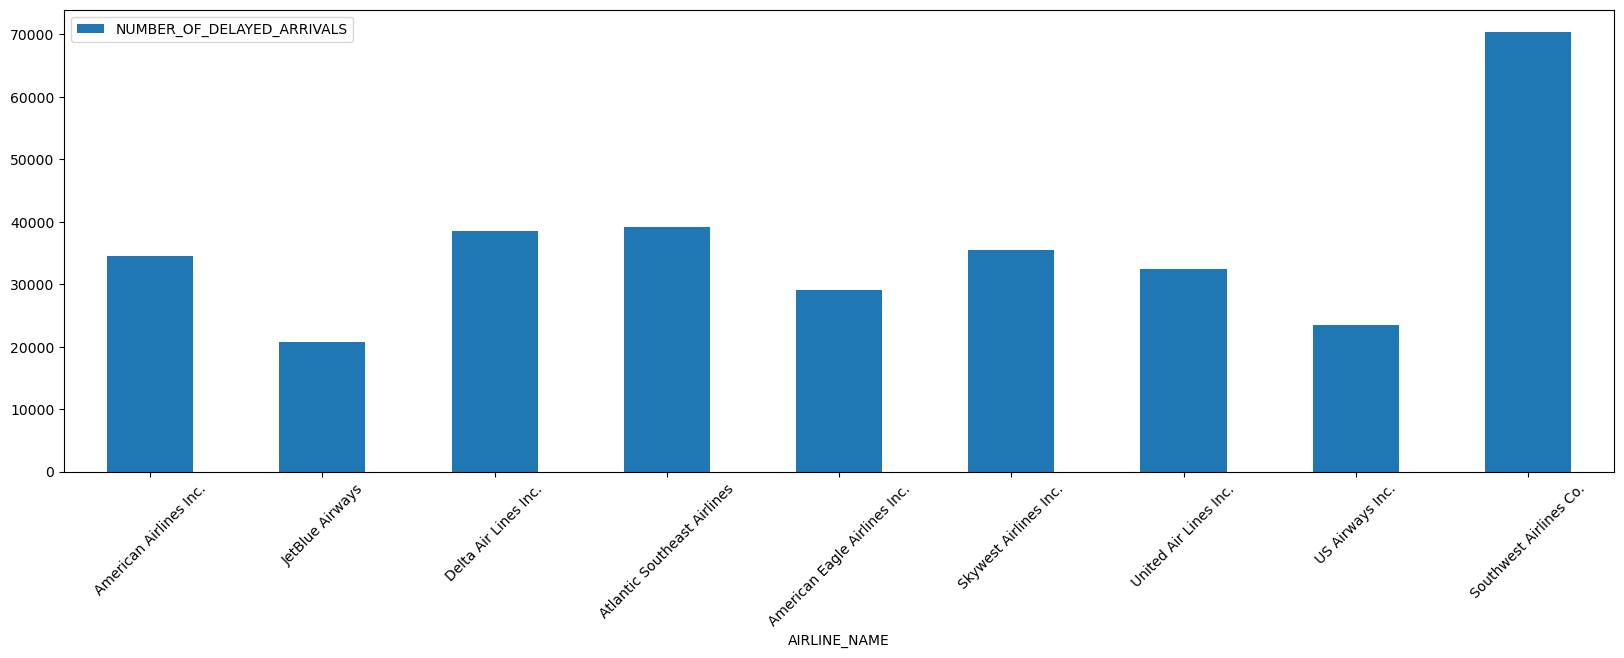

In [27]:
#plot number of delated arrivals by airline
arrival_delays_df.plot(kind="bar", figsize=(20,6), rot=45)

<Axes: >

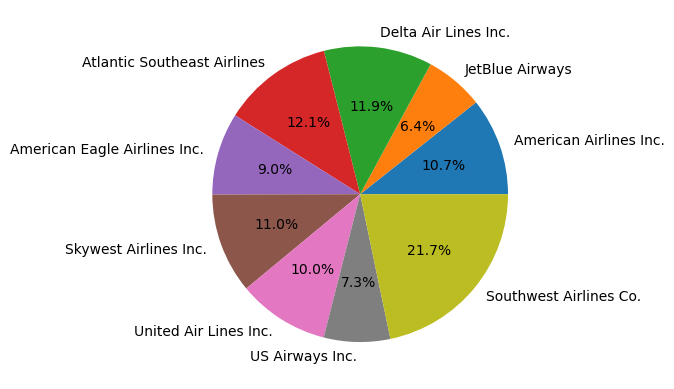

In [28]:
#depature_delays_df.plot.(kind='pie', y='count')
arrival_delays_df.plot.pie(y='NUMBER_OF_DELAYED_ARRIVALS', ylabel='', autopct='%1.1f%%', legend=False, rot=45)

In [29]:
delayed_flight_reasons=first_quarter_filtered_df[["AIRLINE_CODE", "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY","WEATHER_DELAY"]]

#delayed_flight_reasons['AIR_SYSTEM_DELAY'] = delayed_flight_reasons.AIR_SYSTEM_DELAY.fillna(0)
delayed_flight_reasons.loc[:,"AIR_SYSTEM_DELAY"] = delayed_flight_reasons.AIR_SYSTEM_DELAY.fillna(0)
#delayed_flight_reasons['SECURITY_DELAY'] = delayed_flight_reasons.SECURITY_DELAY.fillna(0)
delayed_flight_reasons.loc[:,"SECURITY_DELAY"] = delayed_flight_reasons.SECURITY_DELAY.fillna(0)
#delayed_flight_reasons['AIRLINE_DELAY'] = delayed_flight_reasons.AIRLINE_DELAY.fillna(0)
delayed_flight_reasons.loc[:,"AIRLINE_DELAY"] = delayed_flight_reasons.AIRLINE_DELAY.fillna(0)
#delayed_flight_reasons['LATE_AIRCRAFT_DELAY'] = delayed_flight_reasons.LATE_AIRCRAFT_DELAY.fillna(0)
delayed_flight_reasons.loc[:,"LATE_AIRCRAFT_DELAY"] = delayed_flight_reasons.LATE_AIRCRAFT_DELAY.fillna(0)
#delayed_flight_reasons['WEATHER_DELAY'] = delayed_flight_reasons.WEATHER_DELAY.fillna(0)
delayed_flight_reasons.loc[:,"WEATHER_DELAY"] = delayed_flight_reasons.WEATHER_DELAY.fillna(0)

airline_delays_by_reason=delayed_flight_reasons.groupby(['AIRLINE_CODE'])[['AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','SECURITY_DELAY']].sum().reset_index()

#Get actual airline name
airline_delays_by_reason['AIRLINE_NAME']=airline_delays_by_reason['AIRLINE_CODE'].apply(get_airline_name)

airline_delays_by_reason=airline_delays_by_reason.drop(['AIRLINE_CODE'], axis=1)

airline_delays_by_reason=airline_delays_by_reason.set_index('AIRLINE_NAME')

airline_delays_by_reason=airline_delays_by_reason.sort_values(['AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','SECURITY_DELAY'], ascending=[False, False, False, False, False])

#airline_delays_by_reason = airline_delays_by_reason[["AIRLINE_NAME", "LATE_AIRCRAFT_DELAY","AIR_SYSTEM_DELAY","WEATHER_DELAY","SECURITY_DELAY"]]
airline_delays_by_reason


,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,AIR_SYSTEM_DELAY,WEATHER_DELAY,SECURITY_DELAY
AIRLINE_NAME,,,,,
Southwest Airlines Co.,1141435.0,1819314.0,516295.0,125884.0,3353.0
Delta Air Lines Inc.,893445.0,683117.0,597421.0,235679.0,1115.0
Atlantic Southeast Airlines,842441.0,933071.0,587486.0,67374.0,0.0
American Airlines Inc.,762343.0,822623.0,460651.0,141244.0,1962.0
United Air Lines Inc.,680471.0,710653.0,469780.0,119144.0,32.0
Skywest Airlines Inc.,667921.0,1034834.0,450229.0,96010.0,2159.0
American Eagle Airlines Inc.,470150.0,735773.0,480789.0,189704.0,3800.0
US Airways Inc.,422207.0,345114.0,392720.0,43948.0,3693.0
JetBlue Airways,383453.0,531852.0,372638.0,45694.0,3007.0


<Axes: xlabel='Airline Name', ylabel='Delays by Millions of Minutes'>

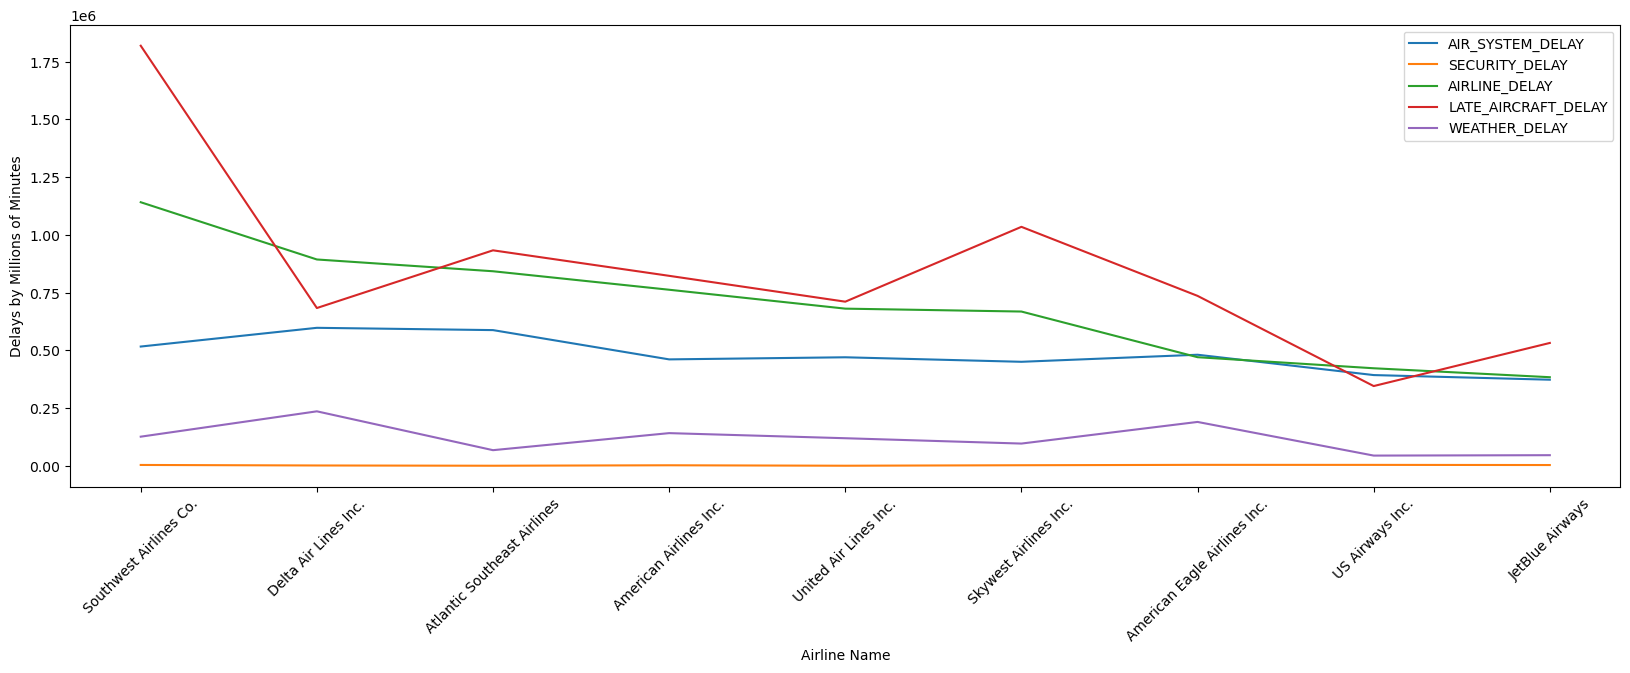

In [30]:
airline_delays_by_reason[["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].plot(xlabel="Airline Name", ylabel='Delays by Millions of Minutes', figsize=(20,6), rot=45)

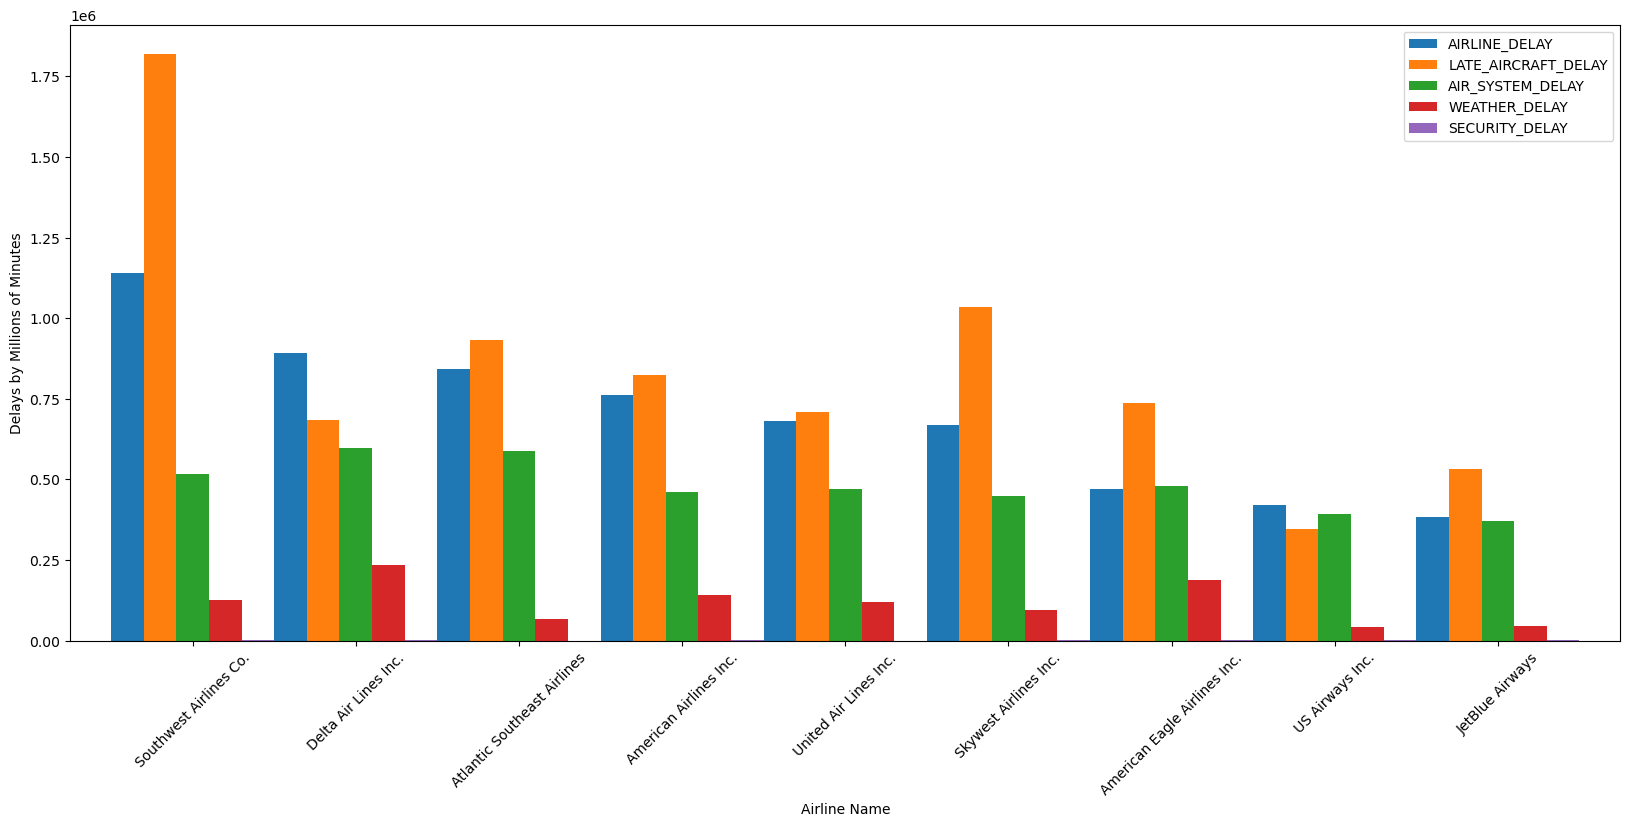

In [31]:
airline_delays_by_reason.plot.bar(figsize=(20,8),rot=45, xlabel="Airline Name",  ylabel='Delays by Millions of Minutes', width=1);